In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [5]:
model = tf.keras.models.Sequential([
         tf.keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation='relu'),
         tf.keras.layers.MaxPooling2D((2, 2)),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(64, activation='relu'),
         tf.keras.layers.Dense(10, activation='softmax')                          
])

In [6]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [7]:
model_output = model.fit(X_train, Y_train, epochs=15)
model.evaluate(X_test, Y_test)

Epoch 1/15
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4216 - accuracy: 0.8528
Epoch 2/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2869 - accuracy: 0.8971
Epoch 3/15
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2448 - accuracy: 0.9101
Epoch 4/15
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2151 - accuracy: 0.9211
Epoch 5/15
1875/1875 [==============================] - 70s 38ms/step - loss: 0.1888 - accuracy: 0.9306
Epoch 6/15
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1673 - accuracy: 0.9385
Epoch 7/15
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1487 - accuracy: 0.9450
Epoch 8/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1302 - accuracy: 0.9520
Epoch 9/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1173 - accuracy: 0.9572
Epoch 10/15
1875/1875 [==============================] - 59s 31m

[0.36598002910614014, 0.9132999777793884]

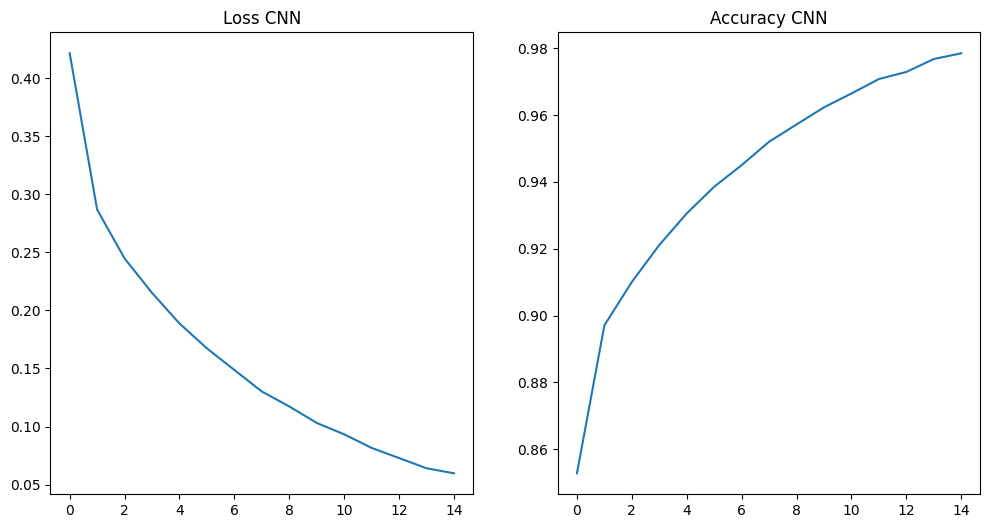

In [8]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()